<a href="https://colab.research.google.com/github/ratthing/Documents/blob/master/Quokka_Quantum_Games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

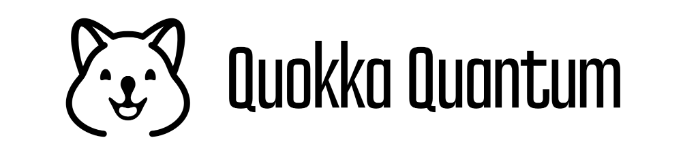

---


# 🎮 **Let’s Make a Quantum Game!**

Welcome to the ultimate journey of creating a **quantum tic-tac-toe game**—where you'll learn the fundamentals of quantum computing by diving straight into the action! This tutorial isn't just about building a game; it's about understanding the core concepts of quantum mechanics, all while having some fun along the way. 🎉

#### 👩‍💻 **What You Need to Know**
Don’t worry if you’re new to quantum computing! This tutorial is designed for beginners. However, having a bit of background in the following areas will help you follow along more smoothly:

- **Object-Oriented Programming**: Familiarity with Python and its object-oriented programming concepts will be handy.
- **Complex Numbers and Trigonometry**: Exposure to these topics will help when we dive into quantum math.

#### 🚫 **What We Aren’t Going to Do**
We’re not making a classical game with a quantum theme. This means we won’t be creating games that simply use randomness, or where elements are "in two places at once," or even games that feature spooky action at a distance.

#### ✅ **What We Are Going to Do**
We are going to build a game that could actually run on a real quantum computer! Our goal is to design a game where the **game state** itself is represented by a quantum program. By the end, you’ll have a working tic-tac-toe game that harnesses the power of quantum mechanics.

### 🖥️ **What Quantum Computer?**

This one! Meet **Quokka**, your personal quantum computer emulator.

<div style="text-align: center;">
   <img src="https://www.dropbox.com/scl/fi/vah5f19i54dbyy5lawz9z/Quokka_Unit.png?rlkey=f9xpwnozq913jpkmb6y9r7cgc&dl=0&raw=1" width="300">
</div>

With Quokka, you’ll be able to simulate quantum programs and bring your quantum tic-tac-toe game to life.

### ⚙️ **Setting Up the Environment**

Before we jump into coding, let's do a bit of housekeeping. The next cell will set up the environment with all the necessary packages and tools we’ll be using throughout this tutorial. Run the cell to get started! 🚀



In [ ]:
# Import essential libraries and modules for the game
from google.colab import widgets  # For widgets in Google Colaboratory environment (if applicable)
from ipywidgets import interact, interactive, fixed, interact_manual, Button, Layout  # For interactive UI elements
import ipywidgets  # Additional ipywidgets utilities (for more complex widgets)
from IPython.display import clear_output  # To clear the output of a cell in Jupyter/Colab

# Data handling and communication
import json  # For working with JSON (JavaScript Object Notation) data
import requests  # For making HTTP requests to the Quokka

# Suppressing warnings (optional)
from requests.packages.urllib3.exceptions import InsecureRequestWarning
requests.packages.urllib3.disable_warnings(InsecureRequestWarning)  # Disable warnings about insecure requests

Next, we create a little helper function that performs the fine-grained operations needed to send your quantum program (quantum circuit or code) to the Quokka and extract only the result of the computation.

In [ ]:
# Create a simple function to wrap your quantum program up, send to Quokka, and extract results
def send_to_the_quokka(circuit):
  req_str_qasm = 'http://quokka1.quokkacomputing.com/qsim/qasm' # the URL listening for qasm files

  # create data to wrap in JSON object to send to Quokka
  data = {
    'script': circuit,
    'count': 1
    }

  result = requests.post(req_str_qasm, json=data, verify=False) # send to Quokka and record results
  json_obj = json.loads(result.content) # convert to dictionary

  return ''.join(map(str, json_obj['result']['c'][0])) # convert to a string of binary values

#My first quantum game

## 🎲 **But First: Classical Game States**

Before we jump into the quantum realm, let’s start with something familiar: **tic-tac-toe**. To implement a tic-tac-toe game, you need a way to store the state of the game in memory. There are nine squares on the board, and each square can be in one of two states—either occupied by Player X or Player O, or unoccupied. This means you’ll need nine bits to represent the entire game board.

Here’s a quick refresher:

- **Nine Squares**: The tic-tac-toe board has 9 squares.
- **Two Options per Square**: Each square can either be `empty`, `X`, or `O`. For simplicity in the classical representation, let’s consider it binary: `empty` or `occupied`.

Thus, a **classical** tic-tac-toe game can be represented by a series of bits (0s and 1s) where each bit represents the state of a single square.

Here’s an implementation of a classical tic-tac-toe game in Python.

### 🧠 **How It Works**:
- **ClassicalBoard Class**: Manages the state of the game board, tracking player moves, and checking for winning combinations.
- **ClassicalGame Class**: Handles the user interface, including button clicks, move logic, and resetting the game.

### 🕹️ **Next Steps**
This classical implementation provides a foundation for understanding how game states and logic work. Next, we’ll extend this concept into the quantum domain, where we’ll explore how qubits and superposition can bring a whole new dimension to the game of tic-tac-toe!

In [ ]:
class ClassicalBoard:
    """
    Represents a classical tic-tac-toe board.

    This class manages:
      - The board cells.
      - Player moves.
      - Win tracking for each player.
    """

    def __init__(self):
        """Initializes the classical board."""
        self.tab = []      # List of dictionaries for each cell {'default': index, 'player': ' '}
        self.winsX = 0     # Number of wins for player X
        self.winsO = 0     # Number of wins for player O

        # Initialize board state
        for idx in range(0, 9):
            self.tab.append({'default': idx, 'player': ' '})

    def make_move(self, cell, player):
        """Applies the move and updates the board state."""
        if self.tab[cell]['player'] == ' ':
            self.tab[cell]['player'] = player
        else:
            print("Illegal move! Cell already occupied.")

    def display(self):
        """Prints the current board state."""
        for row in range(3):
            print('|'.join([self.tab[row * 3 + col]['player'] for col in range(3)]))
            if row < 2:
                print('-' * 5)

    def countWinners(self, player):
        """Counts the number of winning combinations for a given player ('X' or 'O')."""
        winners = ((0, 1, 2), (3, 4, 5), (6, 7, 8), (0, 3, 6), (1, 4, 7), (2, 5, 8), (0, 4, 8), (2, 4, 6))
        for combo in winners:
            if all(self.tab[idx]['player'] == player for idx in combo):
                return True
        return False

    def count_all_winners(self):
        """Counts the number of wins for each player."""
        self.winsX = 0
        self.winsO = 0
        if self.countWinners('X'):
            self.winsX += 1
        if self.countWinners('O'):
            self.winsO += 1

    def new(self):
        """Resets the board for a new game."""
        self.tab.clear()
        for idx in range(0, 9):
            self.tab.append({'default': idx, 'player': ' '})

class ClassicalGame:
    """
    Manages the user interface and interactions for the classical tic-tac-toe game.
    """

    def __init__(self):
        """Initializes the game interface."""
        self.board = ClassicalBoard()  # Create a new classical tic-tac-toe board

        # Create buttons for each cell of the board
        self.boardbutton_list = []
        for idx in range(0, 9):
            button = Button(description=str(idx))
            button.on_click(self.handle_game)  # Connect button clicks to the game handler
            self.boardbutton_list.append(button)

        # Create buttons for game functions (X, O)
        self.funcbutton_list = []
        self.newButton('X')
        self.newButton('O')

        # Initial display
        self.printmenu()
        self.printBoard()

    def newButton(self, name):
        """Creates a new button with the given name and associates it with the game handler."""
        function = Button(description=name, layout=Layout(width='86px', height='30px'))
        function.on_click(self.handle_game)
        self.funcbutton_list.append(function)

    def handle_game(self, b):
        """Handles button clicks and game logic."""
        try:
            if b.description == 'Replay':  # If the Replay button is clicked
                clear_output()
                self.board.new()
                self.printmenu()
                self.printBoard()
            elif int(b.description) >= 0:  # A cell button was clicked
                clear_output()
                self.printmenu()
                self.board.make_move(int(b.description), self.board.function)
                self.printBoard()
                if all(cell['player'] != ' ' for cell in self.board.tab):
                    self.end_game()
            else:  # A function button (X, O) was clicked
                self.board.function = b.description

        except ValueError:  # A function button (X, O) was clicked
            self.board.function = b.description

    def printmenu(self):
        """Prints the menu buttons for selecting move types."""
        grid = widgets.Grid(1, 2)  # Create a grid layout for the buttons
        for (row, col) in grid:  # Iterate over the grid cells
            display(self.funcbutton_list[col])  # Display each button in its cell

    def end_game(self):
        """Ends the game and counts the winning combinations."""
        self.board.count_all_winners()
        print("Game Over!")
        self.scoreboard()
        self.replay()

    def scoreboard(self):
        """Prints the current win counts for each player."""
        print("X wins: " + str(self.board.winsX) + "  O wins: " + str(self.board.winsO))

    def replay(self):
        """Creates and displays the "Replay" button."""
        rep = Button(description="Replay")
        rep.on_click(self.handle_game)
        display(rep)

    def printBoard(self):
        """Prints the current state of the game board."""
        grid = widgets.Grid(1, 3, header_row=True, header_column=True)  # Grid for the board
        for row in range(3):
            for (useless, col) in grid:  # Iterate over the grid cells
                print("\n" + self.board.tab[col + row * 3]['player'] + "\n")  # Display cell contents
                display(self.boardbutton_list[col + row * 3])  # Display the cell button

# Create a new game instance
game = ClassicalGame()

,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Button(description='X', layout=Layout(height='30px', width='86px'), style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Button(description='O', layout=Layout(height='30px', width='86px'), style=ButtonStyle())

<IPython.core.display.Javascript object>

,,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Button(description='0', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Button(description='1', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Button(description='2', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Button(description='3', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Button(description='4', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Button(description='5', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Button(description='6', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Button(description='7', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Button(description='8', style=ButtonStyle())

<IPython.core.display.Javascript object>

### 🎮 **Quantum Game States: The Next Level of Tic-Tac-Toe**

Welcome to the world of **quantum game states**—where your tic-tac-toe board isn’t just a grid of squares, but a canvas for quantum possibilities! 🌌

To help you visualize this, meet your quantum companion, **Quokka**:

<div style="text-align: center;">
   <img src="https://www.dropbox.com/scl/fi/zofd2lwftd6johct9k1uy/whatdoesitdo.png?rlkey=p9jfnkq8zcnwrpwem38paiem7&dl=0&raw=1" width="600">
</div>

### 🔍 **How It Works**

In quantum computing, you’re in control of two things: the **input program** and the **output bits**. But here’s the twist—what happens in between is pure quantum magic, hidden away in the qubits that Quokka processes. **You can't see qubits!** They're like the secret sauce of quantum computing—out of sight, but oh-so-powerful.

### 🎲 **Quantum Tic-Tac-Toe**

In this quantum version of tic-tac-toe, your **game state** isn’t just a static snapshot of X’s and O’s. Instead, it’s a living, breathing **quantum program** that evolves with each player’s move. The game only ends when you send your program to Quokka for resolution, revealing the outcome.

*⚛ What’s different from classical tic-tac-toe?*

- **Multiple Moves**: Players can play on the same square multiple times.
- **Empty Squares**: Some squares might stay empty until the game is resolved.
- **Measure to Win**: The game only concludes when a player decides to "measure"—collapsing the quantum state and determining the final board configuration.

### 🎮 **Time to Play**

Before we dive deeper into the quantum stuff, why not give it a spin?

In [ ]:
class Board:
    """
    Represents a quantum tic-tac-toe board.

    This class manages:
      - OpenQASM code for quantum operations.
      - Mapping of board cells to player moves.
      - Win tracking for each player.
      - Display and measurement of the quantum state.
    """

    def __init__(self):
        """Initializes the quantum board."""
        # Start with basic OpenQASM setup
        self.qc = """
        OPENQASM 2.0;
        qreg q[9];
        creg c[9];
        """
        # State variables for current operation, target qubit, move history, and wins
        self.function = ''  # 'X', 'O', 'SWAP', or empty
        self.target = -1  # Index of the target qubit for SWAP operation
        self.tab = []      # List of dictionaries for each cell {'default': index, 'player': ''}
        self.winsX = 0     # Number of wins for player X
        self.winsO = 0     # Number of wins for player O

        # Initialize board state with Hadamard gates on all qubits
        for idx in range(0, 9):
            self.tab.append({'default': idx, 'player': ' '})
            self.qc += 'h q[{}];'.format(idx)

    def make_move(self, cell):
        """Applies a quantum gate based on the selected move and updates the board state."""
        if self.function == 'X':
            self.qc += 'h q[{}];'.format(cell)
            self.tab[int(cell)]['player'] += 'X - '
        elif self.function == 'O':
            self.qc += '''h q[{}];
                          x q[{}];'''.format(cell,cell)
            self.tab[int(cell)]['player'] += "O - "
        elif self.function == 'SWAP' and self.target != cell:
            if self.target == cell:
                self.target = -1
            else:
                self.qc += 'swap q[{}], q[{}];'.format(cell,self.target)
                self.tab[int(cell)]['player'] += "S - "
                self.tab[int(self.target)]['player'] += "S - "

    def display(self):
        """Prints the current OpenQASM code for the quantum board."""
        print(self.qc)

    def measure(self):
        """Measures the quantum state, determines winners, and updates the classical board."""
        for idx in range(0,9):
            self.qc += 'measure q[{}] -> c[{}];'.format(idx,idx)

        output = send_to_the_quokka(self.qc)

        for idx in range(0,9):
            if output[9-1-idx] == '0':
                self.tab[idx]['player'] = 'X'
            else:
                self.tab[idx]['player'] = 'O'
        self.winsX = self.countWinners('X')
        self.winsO = self.countWinners('O')

    def countWinners(self, player):
        """Counts the number of winning combinations for a given player ('X' or 'O')."""
        winners = ((0,1,2),(3,4,5),(6,7,8),(0,3,6),(1,4,7),(2,5,8),(0,4,8),(2,4,6))
        wins = 0
        for idx in range(len(winners)):
            won = True
            for jdx in range(len(winners[0])):
                if not self.tab[winners[idx][jdx]]['player'] == player:
                    won = False
            if won:
                wins = wins + 1
        return wins

    def new(self):
        """Resets the board for a new game."""
        self.tab.clear()
        self.qc = """
        OPENQASM 2.0;
        qreg q[9];
        creg c[9];
        """
        for idx in range(0,9):
            self.tab.append({'default':str(idx), 'player':''})
            self.qc += 'h q[{}];'.format(idx)

class Game:
    """
    Manages the user interface and interactions for the quantum tic-tac-toe game.
    """

    def __init__(self):
        """Initializes the game interface."""
        self.selecting = False  # Flag to indicate if a SWAP target is being selected
        self.board = Board()    # Create a new quantum tic-tac-toe board

        # Create buttons for each cell of the board
        self.boardbutton_list = []
        for idx in range(0, 9):
            button = Button(description=str(idx))
            button.on_click(self.handle_game)  # Connect button clicks to the game handler
            self.boardbutton_list.append(button)

        # Create buttons for game functions (Measure, X, O, SWAP)
        self.funcbutton_list = []
        self.newButton('Measure')
        self.newButton('X')
        self.newButton('O')
        self.newButton('SWAP')

        # Initial display
        self.printmenu()
        self.printBoard()

    def newButton(self, name):
        """Creates a new button with the given name and associates it with the game handler."""
        function = Button(description=name, layout=Layout(width='86px', height='30px'))
        function.on_click(self.handle_game)
        self.funcbutton_list.append(function)

    def handle_game(self, b):
        """Handles button clicks and game logic."""
        try:
            if b.description == 'Measure':
                clear_output()
                self.replay()  # Display the "Replay" button after measurement
                self.board.measure()
                self.scoreboard()
                self.printBoard()
            elif b.description == 'Replay':
                clear_output()
                self.board.new()
                self.printmenu()
                self.printBoard()
            elif int(b.description) >= 0:  # A cell button was clicked
                if self.selecting:  # If in SWAP mode, set the target qubit
                    self.board.target = int(b.description)
                else:  # Otherwise, make a move ('X' or 'O')
                    clear_output()
                    self.printmenu()
                    self.board.make_move(int(b.description))
                    self.printBoard()
            self.selecting = False
        except ValueError:  # A function button (X, O, SWAP) was clicked
            self.board.function = b.description
            self.selecting = False  # Reset selecting flag, except for SWAP
            if self.board.function == 'SWAP':
                self.selecting = True

    def printmenu(self):
        """Prints the menu buttons for selecting move types."""
        grid = widgets.Grid(1, 4)  # Create a grid layout for the buttons
        for (row, col) in grid:  # Iterate over the grid cells
            display(self.funcbutton_list[col])  # Display each button in its cell

    def scoreboard(self):
        """Prints the current win counts for each player."""
        print("X wins: " + str(self.board.winsX) + "  O wins: " + str(self.board.winsO))

    def replay(self):
        """Creates and displays the "Replay" button."""
        rep = Button(description="Replay")
        rep.on_click(self.handle_game)
        display(rep)

    def printBoard(self):
        """Prints the current state of the game board."""
        grid = widgets.Grid(1, 3, header_row=True, header_column=True)  # Grid for the board
        for row in range(3):
            for (useless, col) in grid:  # Iterate over the grid cells
                print("\n"+self.board.tab[col + row * 3]['player']+"\n")  # Display cell contents
                display(self.boardbutton_list[col + row * 3])  # Display the cell button

# Play the game!
game = Game()

,,,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Button(description='Measure', layout=Layout(height='30px', width='86px'), style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Button(description='X', layout=Layout(height='30px', width='86px'), style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Button(description='O', layout=Layout(height='30px', width='86px'), style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Button(description='SWAP', layout=Layout(height='30px', width='86px'), style=ButtonStyle())

<IPython.core.display.Javascript object>

,,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Button(description='0', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Button(description='1', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Button(description='2', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Button(description='3', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Button(description='4', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Button(description='5', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Button(description='6', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Button(description='7', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Button(description='8', style=ButtonStyle())

<IPython.core.display.Javascript object>

### 🎭 **Is It Really Quantum?**

So, you just played a game that ran on a quantum computer. Pretty cool, right? But here’s a question: **Did it really feel quantum?** 🤔

You might be thinking, "Well, it ran on a quantum computer, so it must be quantum, right?" True—but let’s dive deeper into this idea.

### 🔄 **Classical Physics: A Subset of Quantum Physics**

Here’s a mind-bending perspective: **classical physics, including computation and games, is actually a subset of quantum physics.** This means that everything we consider classical—like the bits in your computer, or even a regular game of tic-tac-toe—exists within the broader, richer framework of quantum mechanics.

Think of it this way:

- **All is Quantum**: The entire universe, including all its classical aspects, operates under the rules of quantum physics.
- **Classical within Quantum**: Some processes or states are classical, which means they behave predictably in ways we’re used to—like bits flipping between 0 and 1.

### 💡 **Classical Games on Quantum Computers**

So, when you run a game on a quantum computer, it might still behave **classically**. In other words, you could have achieved the same outcome using a regular digital computer. It’s only when we start leveraging the **quantum properties**—like superposition, entanglement, and interference—that we enter truly quantum territory.

### 📊 **Qubits: More Than Just Bits**

Now, let’s get a bit more technical. Every qubit in a quantum computer carries at least as much information as a classical bit. But qubits can do so much more—they can exist in states that are not just `0` or `1`, but **superposition** states, and they can be **entangled** with other qubits in ways that classical bits could never be.

### 🔍 **Let’s Explore Quantum Power**

In the next sections, we’ll dive into how we can push the boundaries of our game, moving from classical to quantum. We’ll explore how to harness the full potential of qubits, making the game not just run on a quantum computer, but also **feel** truly quantum.

Get ready to unlock the quantum potential! 🧠✨


---
## 🧠 **Quantum 101**

Before we jump into the quantum version of our game, let's take a moment to understand the basics of **qubits** and **superposition**—the building blocks of quantum computing. 🌟

### 💡 **The Qubit**

A **qubit** is the quantum version of a classical bit, but with some fascinating twists! Instead of just being `0` or `1`, a qubit can be represented with a combination of both. Mathematically, a qubit is represented by a two-dimensional vector; here are some examples:

$$
\pmatrix{1\\0}, \pmatrix{0\\1}, \pmatrix{\frac{1}{\sqrt2}\\ \frac{1}{\sqrt2}}, \pmatrix{\frac{1}{\sqrt2}\\ -\frac{1}{\sqrt2}}, \pmatrix{0\\ e^{i\frac{\pi}{2}}}, \ldots
$$

Some things to notice:
* The numbers can be **negative**;
* The numbers can be **complex** (i.e., they can use the imaginary number $i = \sqrt{-1}$);
* The length of the vector is always **1**.

If we represent the numbers by variables $\alpha$ and $\beta$, then:

$$
\text{Length} = |\alpha|^2 + |\beta|^2 = 1.
$$

### 🔢 **The Bit**

You’re already familiar with **bits** as the basic unit of classical information, typically represented as `0` or `1`. Any two mutually exclusive possibilities can represent a bit, for example:

$$
\pmatrix{1\\0} \text{ and } \pmatrix{0\\1}.
$$

In quantum mechanics, these correspond to the states:

$$
|0\rangle = \pmatrix{1\\0} \quad \text{and} \quad |1\rangle = \pmatrix{0\\1},
$$

which are called **"computational states"** in quantum language.

In quantum notation, the symbol $|\text{label}\rangle$ is just a fancy way to refer to vectors. This is called **"ket"** or **"Dirac notation"**. For quantum computation, vectors and "states" are synonymous.

**It’s usually assumed that qubits in quantum computations start in the state $|0\rangle$.**

### 🌐 **Superposition**

Unlike a classical bit, a qubit can be in a state called **superposition**, where it’s a blend of `0` and `1`. Any qubit state that isn’t purely $|0\rangle$ or $|1\rangle$ is in superposition. Here’s how it works:

$$
\pmatrix{\alpha \\ \beta} = \pmatrix{\alpha \\ 0} + \pmatrix{0 \\ \beta} = \alpha \pmatrix{1 \\ 0} + \beta \pmatrix{0 \\ 1}.
$$

In quantum notation:

$$
|\psi\rangle = \alpha|0\rangle + \beta|1\rangle.
$$

This state isn’t just `0` or `1`; it’s a combination that can represent both at the same time! But don’t be fooled—this "two places at once" analogy can be misleading. The state is singular; it’s just **$|\psi\rangle$**.

### ✍️ **Writing Qubits**

Imagine a classical computer with a 4-bit memory:

$$
b_0 b_1 b_2 b_3,
$$

where each bit `$b$` can be `0` or `1`. Usually, we start with all bits in the state `0000`. To encode a different state, like `0101`, we perform logic operations (like `NOT`) on specific bits.

In quantum computing, we do something similar. All qubits start in the state $|0\rangle$. To encode quantum data, we apply **quantum logic operations** to these qubits.

One such operation is **$X$**, which changes $|0\rangle$ to $|1\rangle$ and vice versa. But there are many more quantum operations you’ll hopefully encounter soon! 💫

### 👀 **Reading Qubits**

Here’s the catch with quantum computing: **you can’t "read" qubits** in the same way you read classical bits.

When you measure a qubit:

$$
|\psi\rangle = \alpha|0\rangle + \beta|1\rangle,
$$

the result will only ever be `0` or `1`—which corresponds to a single bit.

**Let’s emphasize this:**

**The result of measuring $n$ qubits of information is $n$ bits of information.**

But how do you know which bit you’re going to get? Well, you don’t—at least not exactly. But it’s not completely random:

When you measure a qubit in the state $|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$, you get `0` with probability $|\alpha|^2$ and `1` with probability $|\beta|^2$.

This is why:

$$
|\alpha|^2 + |\beta|^2 = 1.
$$

Probabilities must add up to `1`! 🎲

## 🗣️ **QASM: The Language of Quokka**

What language does the Quokka speak? 🐹 It speaks **QASM**!

We’ll be writing our quantum programs using **QASM (Quantum Assembly Language)**, the standard language for describing quantum circuits. Just like any programming language, QASM lets you tell Quokka exactly what quantum operations you want it to perform.

- **Documentation**: For all the technical details, you can dive into the [QASM documentation](https://github.com/openqasm/openqasm/tree/OpenQASM2.x).
  
- **Quick Tip**: If you’re ever unsure about your QASM code, you can paste your script into a tool like [Quantum Circuit](https://quantum-circuit.com/) to visualize the circuit you’ve created. 🛠️

QASM is powerful, but it’s also approachable. As you go through examples and build your quantum game, you’ll get the hang of it in no time. Ready to start coding your quantum game? Let’s do this! 🚀

In [ ]:
# QASM is text based, so we'll use strings here in Python

# Every QASM files starts the same

program = """
OPENQASM 2.0;
"""

# Next, we specify the number of qubits using the command "qreg q[  ];"

program += """
qreg q[1];
"""

# Finally, the initialization is complete by specifying the classical
# registers where the results of measurement are stored
# this is done using "creg c[  ];"

program += """
creg c[1];
"""

Now the variable `program` stores a three-line quantum program in the QASM language.

### 🎯 **Step 2: Measuring the Qubit**

Recall that qubits are always initialized in the $|0\rangle$ state. This state corresponds to $|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$ with $\alpha = 1$ and $\beta = 0$. Since $\alpha = 1$, the chance we will get the result `0` when we execute this program is also `1`.

Let’s check by adding a measurement to our program:

In [ ]:
# To read a qubit, we use "measure q[ ] -> c[ ]"
# This QASM command says measure a qubit and store the bit value
# in a classical register

program += """
measure q[0] -> c[0];
"""

send_to_the_quokka(program)

'0'

Phew! As expected, you’ll always get `0` because the qubit starts in the $|0\rangle$ state.

### 🛠️ **Step 3: Manipulating the Qubit with Quantum Gates**

Now, let’s do something more interesting. We’ll use a quantum gate to change the state from $|0\rangle$ to $|1\rangle$. The quantum "gate" that does this is called `x` or **NOT**, just like in classical logic.

In [ ]:
# Set up our program as before

program = """
OPENQASM 2.0;
qreg q[1];
creg c[1];
"""

# To apply a quantum instruction, or "gate", use the pattern "gate q[ ];"
# We want to apply NOT, which is "x" in the QASM language

program += """
x q[0];
"""

# Finally, read the qubit and execute the program

program += """
measure q[0] -> c[0];
"""

send_to_the_quokka(program)


'1'

As expected, this flips the qubit from $|0\rangle$ to $|1\rangle$.

### 🪙 **Step 4: Creating a Quantum Coin**

Now, let’s make things quantum! We’ll create a **quantum coin**—a program that returns either `0` or `1` with equal probability.

To do this, we need the qubit to be in a superposition state where $\alpha = \beta = \frac{1}{\sqrt{2}}$. This state is represented as:

$$
|+\rangle = \frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle.
$$

To achieve this, we use a **Hadamard gate**, represented by `h` in QASM.


In [ ]:
# Set up our program as before

program = """
OPENQASM 2.0;
qreg q[1];
creg c[1];
"""

# We want to apply hadamard, which is "h" in the QASM language

program += """
h q[0];
"""

# Finally, we read the qubitm which completes the program

program += """
measure q[0] -> c[0];
"""

### 🎲 **Step 5: Running Multiple Trials**

Now, let’s see if our quantum coin is truly random by running the program multiple times:

In [ ]:
n_trials = 10

results = []
for idx in range(n_trials):
    results.append(send_to_the_quokka(program))

print(results)

['1', '1', '1', '1', '1', '0', '0', '1', '0', '1']


So random! 🎉 As you can see, the results will vary between `0` and `1` in a seemingly random fashion, thanks to the superposition state we created.

### 🔍 **Mathematical Interlude: Understanding Quantum Gates**

Behind the scenes of quantum computing lies the powerful machinery of **linear algebra**. Quantum gates—like their classical counterparts—transform the state of qubits, but they do so in a much richer way, thanks to the underlying mathematics.

### 🔄 **The $X$ Gate (NOT Gate)**

Let’s start with the $X$ gate, which is the quantum equivalent of the classical NOT gate. It flips the state of a qubit:

$$
X:|0\rangle \to |1\rangle,\\
X:|1\rangle \to |0\rangle.
$$

This gate is straightforward: if the qubit is in state $|0\rangle$, the $X$ gate flips it to $|1\rangle$, and vice versa.

Now, consider what happens when the qubit is in a **superposition state**:

$$
|\psi\rangle = \alpha |0\rangle + \beta |1\rangle.
$$

When we apply the $X$ gate to this state, we simply swap the coefficients:

$$
X|\psi\rangle = \alpha |1\rangle + \beta |0\rangle.
$$

### ✨ **The $H$ Gate (Hadamard Gate)**

Next, let’s examine the **Hadamard** gate, which is crucial for creating superposition. The $H$ gate acts as follows:

$$
H:|0\rangle \to \frac{1}{\sqrt{2}}(|0\rangle+|1\rangle),\\
H:|1\rangle \to \frac{1}{\sqrt{2}}(|0\rangle-|1\rangle).
$$

The Hadamard gate takes a basis state $|0\rangle$ or $|1\rangle$ and transforms it into an equal superposition of $|0\rangle$ and $|1\rangle$ (with either a plus or minus sign).

Now, let’s apply the $H$ gate to a general superposition state:

$$
|\psi\rangle = \alpha |0\rangle + \beta |1\rangle.
$$

Under the Hadamard transformation, this state becomes:

$$
H|\psi\rangle = \frac{\alpha}{\sqrt{2}}(|0\rangle+|1\rangle) + \frac{\beta}{\sqrt{2}}(|0\rangle-|1\rangle).
$$

This simplifies to:

$$
H|\psi\rangle = \frac{\alpha+\beta}{\sqrt{2}}|0\rangle + \frac{\alpha-\beta}{\sqrt{2}}|1\rangle.
$$

This result shows how the Hadamard gate mixes the coefficients of $|0\rangle$ and $|1\rangle$, creating new quantum states that are pivotal in many quantum algorithms.

### 🌀 **Introducing Rotation Gates**

Now, let’s explore a more flexible class of gates—**rotation gates**. These gates allow you to rotate the qubit state around different axes on the Bloch sphere. In QASM, these are represented as `rx`, `ry`, and `rz`.

For example, the **$R_y(\theta)$** rotation gate rotates the qubit around the Y-axis by an angle $\theta$. Mathematically, it’s expressed as:

$$
R_y(\theta):|0\rangle \to \cos(\theta/2)|0\rangle - \sin(\theta/2)|1\rangle,\\
R_y(\theta):|1\rangle \to \sin(\theta/2)|0\rangle + \cos(\theta/2)|1\rangle.
$$

### 💡 **How It Works**

The $R_y(\theta)$ gate provides a continuous range of states between $|0\rangle$ and $|1\rangle$, depending on the angle $\theta$. This gate is incredibly powerful because it gives you precise control over the qubit’s state, allowing for fine-tuned quantum operations.

For more detailed information, you can check out standard references like [this one](https://en.wikipedia.org/wiki/List_of_quantum_logic_gates#Rotation_operator_gates), which cover the full range of quantum gates.

With this understanding of quantum gates, you’re ready to tackle more complex quantum programs and see how these gates come together to create powerful quantum algorithms. Let’s put this knowledge into action! 🚀

In [ ]:
# Set up our program as before

program = """
OPENQASM 2.0;
qreg q[1];
creg c[1];
"""

# We want to apply "ry," but watch this!

program += """
h q[0];
ry(pi/2) q[0];
"""

# Finally, we read the qubitm which completes the program

program += """
measure q[0] -> c[0];
"""

# run and see what happens
n_trials = 10

results = []
for idx in range(n_trials):
    results.append(send_to_the_quokka(program))

print(results)

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0']


Hmmm... look at that 👀. It seems like $\theta = \pi$ makes ```ry``` act like ```x```.

### 🔍 **Exploring the $R_y(\pi)$ Gate: Almost Like an $X$ Gate**

Let’s take a closer look at the $R_y(\pi)$ gate and see how it behaves similarly to the $X$ gate. This is a great example of how different quantum gates can sometimes achieve similar results—though with a twist.

### 🔄 **Proving the Similarity**

We know that the $R_y(\theta)$ gate rotates the qubit around the Y-axis by an angle $\theta$. Let’s see what happens when $\theta = \pi$:

$$
R_y(\pi):|0\rangle \to \cos(\pi/2)|0\rangle - \sin(\pi/2)|1\rangle,\\
R_y(\pi):|1\rangle \to \sin(\pi/2)|0\rangle + \cos(\pi/2)|1\rangle.
$$

Now, let’s consult a table of special angles. We find that:

- $\sin(\pi/2) = 1$
- $\cos(\pi/2) = 0$

You can visualize these angles on the unit circle, as shown in the figure below:

<div style="text-align: center;">
   <img src="https://upload.wikimedia.org/wikipedia/commons/e/ee/Unit_circle_sine_cosine.svg" width="500">
</div>

Substituting these values into our equations:

$$
R_y(\pi):|0\rangle \to 0 \cdot |0\rangle - 1 \cdot |1\rangle = -|1\rangle,\\
R_y(\pi):|1\rangle \to 1 \cdot |0\rangle + 0 \cdot |1\rangle = |0\rangle.
$$

So, we have:

$$
R_y(\pi):|0\rangle \to -|1\rangle,\\
R_y(\pi):|1\rangle \to |0\rangle.
$$

### ✨ **Conclusion**

As you can see, $R_y(\pi)$ effectively flips the qubit state, just like the $X$ gate. The only difference is that $R_y(\pi)$ introduces a negative sign when flipping $|0\rangle$ to $|1\rangle$. So while it’s not exactly the same as $X$, it’s very close!

### 🎮 **Test Your Skills**

Now it’s your turn! Use the `ry` gate to create a quantum coin that produces bits at random. Here’s the challenge:


In [ ]:
# change the parameter in ry() so that the bits produced are random

# note that you can use "/" for division

program = """
OPENQASM 2.0;
qreg q[1];
creg c[1];
ry(pi) q[0];
measure q[0] -> c[0];
"""

# run and see what happens
n_trials = 10

results = []
for idx in range(n_trials):
    results.append(send_to_the_quokka(program))

print(results)

['1', '1', '1', '1', '1', '1', '1', '1', '1', '1']


## 🔗 **Entanglement: Unlocking the Power of the $CX$ Gate**

Welcome to the fascinating world of **entanglement**—a cornerstone of quantum computing where qubits become intertwined in such a way that the state of one qubit directly affects the state of another, no matter how far apart they are. The key to creating this quantum link is the **$CX$ gate**, also known as the **CNOT** (Controlled-NOT) gate.

In QASM, this gate is represented by the command `cx`.

### 🔄 **Understanding the $CX$ Gate**

The $CX$ gate operates on two qubits, and depending on the state of the **control qubit** (the first qubit), it may or may not flip the **target qubit** (the second qubit). Here’s the mathematical representation of the $CX$ gate:

$$
CX:|00\rangle \to |00\rangle,\\
CX:|01\rangle \to |01\rangle,\\
CX:|10\rangle \to |11\rangle,\\
CX:|11\rangle \to |10\rangle.
$$

In simpler terms:

- If the control qubit is in the state $|0⟩$, nothing happens to the target qubit.
- If the control qubit is in the state $|1⟩$, the target qubit flips from $|0⟩$ to $|1⟩$ or from $|1⟩$ to $|0⟩$.

This is why it’s called a **controlled-X** gate: the state of the control qubit determines whether the target qubit undergoes the $X$ (NOT) operation.

### 🛠️ **Let’s Build a QASM Program with $CX$**

Now, let's see how we can use the $CX$ gate in a QASM program. The following example will show you how to create entanglement between two qubits.

### 🧠 **What This Program Does**

1. **Initialization**: The program starts by initializing two qubits (`qreg q[2];`) and two classical bits (`creg c[2];`) to store the measurement results.

2. **Superposition**: The Hadamard gate (`h q[0];`) is applied to the first qubit, putting it into a superposition state where it’s equally likely to be measured as `0` or `1`.

3. **Entanglement**: The $CX$ gate (`cx q[0], q[1];`) entangles qubit 0 and qubit 1. If qubit 0 is $|0\rangle$, qubit 1 remains unchanged. If qubit 0 is $|1\rangle$, qubit 1 flips.

4. **Measurement**: Finally, both qubits are measured, and their states are stored in the classical bits.

### 🎲 **Running the Program**

When you run this program multiple times, you’ll notice that the results of measuring the two qubits are either `00` or `11`. This indicates that the qubits are perfectly correlated—if one is `0`, so is the other, and the same goes for `1`. This correlation is a hallmark of **entanglement**.



In [ ]:
# we'll need 2 quantum and 2 classical registers this time

program = """
OPENQASM 2.0;
qreg q[2];
creg c[2];
"""

# let's put the "control" qubit in superposition using "h"

program += """
h q[0];
"""

# now we apply the "cx" gate using the pattern "cx q[ control ], q[ target ]"

program += """
cx q[0], q[1];
"""

# finally, read the qubits and execute the program

program += """
measure q[0] -> c[0];
measure q[1] -> c[1];
"""

# run and see what happens
n_trials = 10

results = []
for idx in range(n_trials):
    results.append(send_to_the_quokka(program))

print(results)

['11', '00', '11', '11', '00', '00', '00', '11', '00', '11']



🚀Oh, now that's interesting! It seems the bits are perfectly correlated but also random.

**Let's do one last bit of math.** ✅

We start with $|00\rangle$ as always. Then, $H$ is applied to the first qubit. So we have,

$$
\frac1{\sqrt2}|00⟩+\frac1{\sqrt2}|10\rangle.
$$

Now, the $CX$ gate acts on each term individually (that's the beauty of *linear* algebra):

$$
\frac1{\sqrt2}CX|00⟩+\frac1{\sqrt2}CX|10\rangle.
$$

Consulting the table above for definition of $CX$ (or recalling that it flips the second bit label conditional on the first), we get the final two-qubit state:

$$
\frac1{\sqrt2}|00⟩+\frac1{\sqrt2}|11\rangle.
$$

We can see that either each qubit will be read as $0$ or $1$, and these alternatives happen with equal probability. They are *correlated*. When quantum data is correlated, it is called **entanglement**.

That's it. Now you know quantum computing! 🎉


## 🎮 **Real quantum games**

In the quantum twist on Tic-Tac-Toe, the entire game state is a quantum program written in QASM, with each square on the board represented by a qubit. The objective is simple: execute the program, and if `0` is returned for `q[0]`, Player X claims that square. After execution, Quokka transforms your quantum program into a "classical" game state, where traditional win conditions can be checked.

### 🎲 **Setting Up the Quantum Board**

At the start, each square on the board is placed into an equal superposition state using the Hadamard gate (`h`). This ensures a level playing field, as every square is equally likely to be won by either player.

### 🔄 **Quantum Moves for Each Player**

- **Player X**: The goal is to collapse the superposition back to the $|0\rangle$ state. This is achieved by applying another Hadamard gate (`h`).

- **Player O**: The aim is to flip the superposition state to $|1⟩$. Player O accomplishes this by first applying a Hadamard gate (`h`) to bring the state back to $|0⟩$, and then flipping it to $|1⟩$ using the $X$ gate.

### ✨ **Quantum Challenge: Customize with $R_y(\theta)$**

Ready for a challenge? Try replacing the X and O moves with a single `ry` gate that takes an angle $\theta$. By tweaking $\theta$, you can adjust the probabilities of each player winning a square, adding a new layer of quantum strategy to the game.

### 🚀 **Game On!**

Now it’s your turn to get creative. Build your own version of quantum Tic-Tac-Toe or invent an entirely new quantum game using the moves we’ve explored. Experiment with different quantum gates, develop unique strategies, and see how the quantum nature of the game transforms the traditional Tic-Tac-Toe experience. Who knows—you might just create the next big quantum game! 🎲✨

### 🧠 **Customize, Experiment, and Innovate**

- Try out different quantum gates and sequences.
- Use `ry` gates with various $\theta$ values to craft more complex moves.
- Discover new strategies that leverage quantum principles to outsmart your opponent.

The quantum realm offers limitless possibilities—let’s see what kind of game you can create! 🎮💡